In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Cardiotocographic.csv')

In [4]:
print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [6]:
missing_percentage = df.isnull().sum() * 100 / len(df)
print("Percentage of missing values per column:")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

Percentage of missing values per column:
LB          0.987770
DS          0.987770
DP          0.987770
MLTV        0.987770
Tendency    0.987770
Width       0.987770
NSP         0.987770
AC          0.940734
dtype: float64


# Imputing missing values with the median of each column

In [7]:
df_imputed = df.fillna(df.median())

In [8]:
df_imputed.isna().sum()

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


In [9]:
df_imputed.describe()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.340204,0.003204,0.009894,0.004391,0.001895,0.000002,0.000173,46.995984,1.364378,10.285964,8.276147,70.395387,0.313246,1.301499
std,11.214379,0.004373,0.067540,0.003340,0.003343,0.000141,0.000836,18.813973,1.173632,21.205041,7.734851,42.720508,0.643186,0.642133
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005606,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.800000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


# Data Visualization

In [10]:
# Set the style for the plots
sns.set_style("whitegrid")

<Axes: >

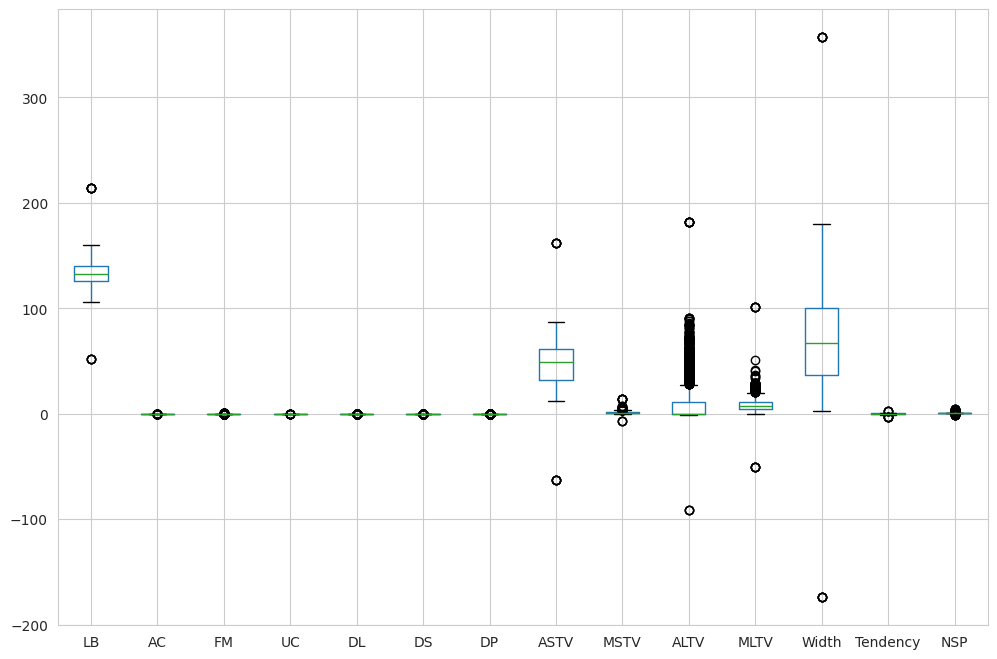

In [11]:
df_imputed.boxplot(figsize=(12, 8))

In [13]:
# Identify categorical columns (assuming any column with object dtype is categorical)
categorical_cols = df_imputed.select_dtypes(include='object').columns

if len(categorical_cols) == 0:
    print("No categorical columns found in the DataFrame.")
else:
    for col in categorical_cols:
        plt.figure(figsize=(10, 6))
        df[col].value_counts().plot(kind='bar')
        plt.title(f'Frequency of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

No categorical columns found in the DataFrame.


### histogram for the 'LB' column to visualize its distribution

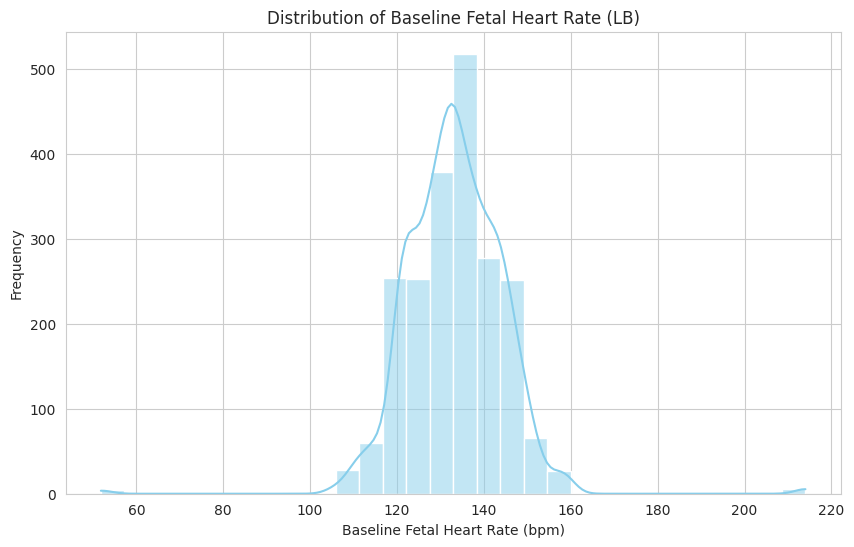

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df_imputed['LB'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Baseline Fetal Heart Rate (LB)')
plt.xlabel('Baseline Fetal Heart Rate (bpm)')
plt.ylabel('Frequency')
plt.savefig('LB_distribution_histogram.png')
plt.show()

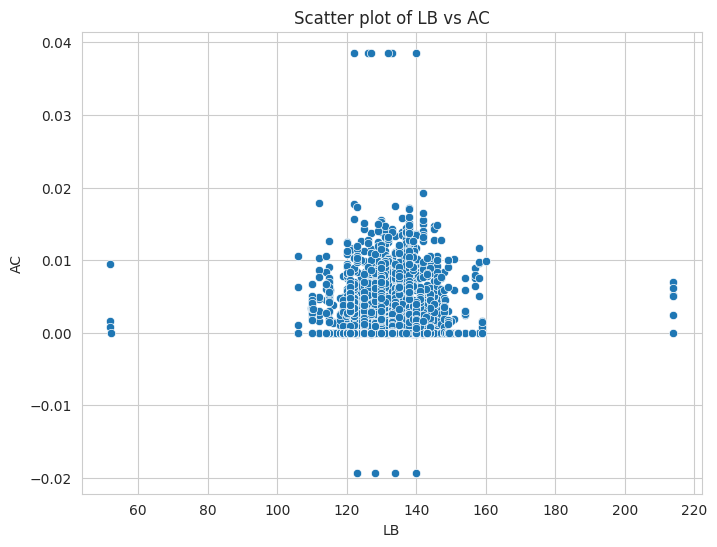

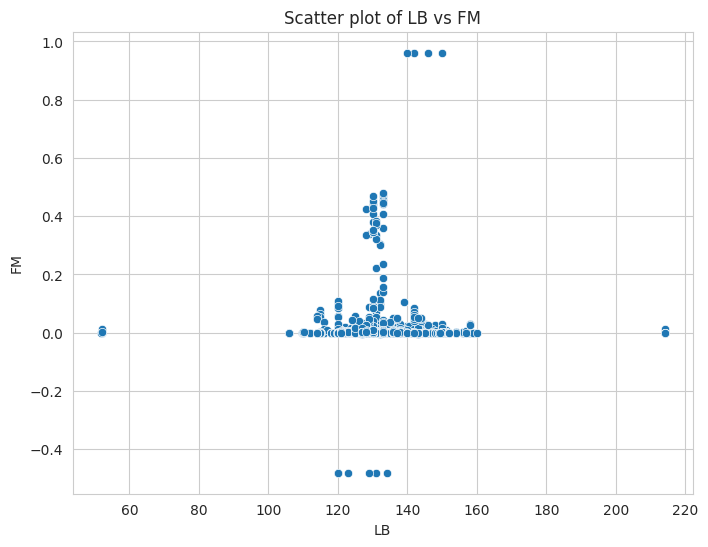

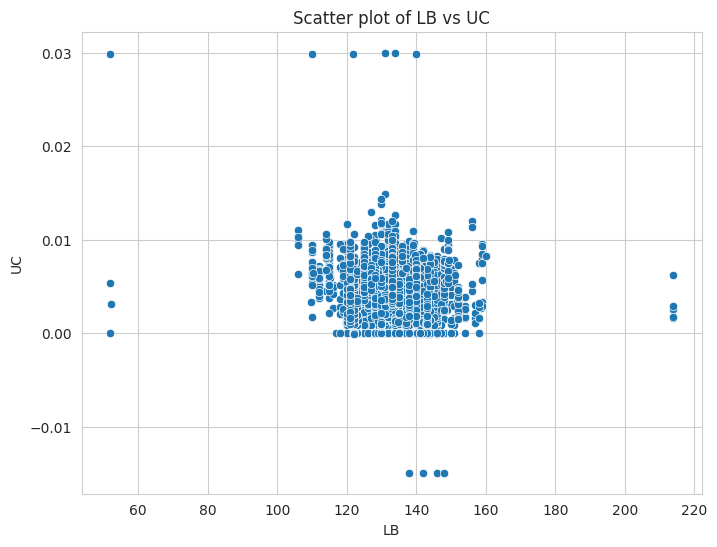

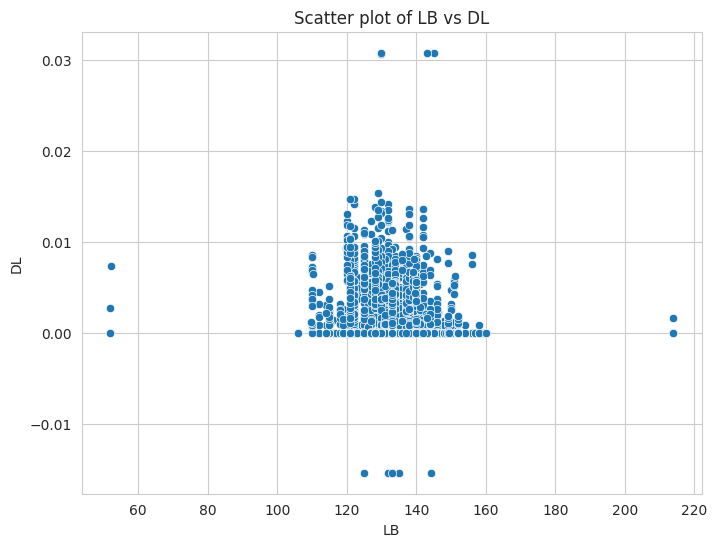

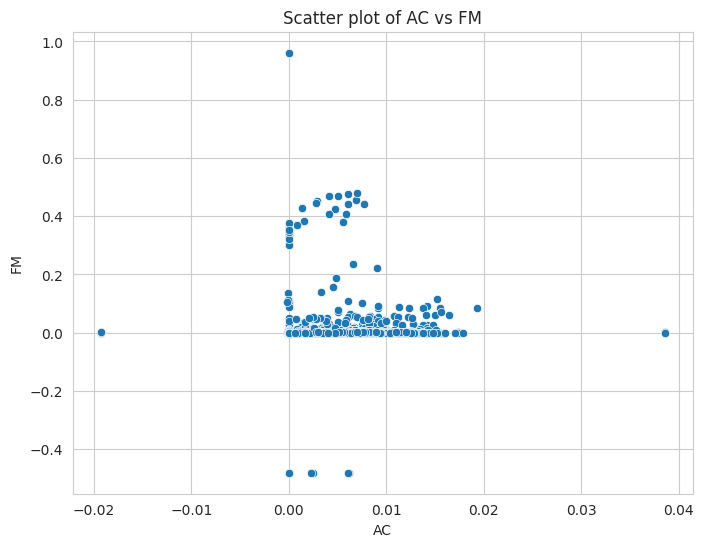

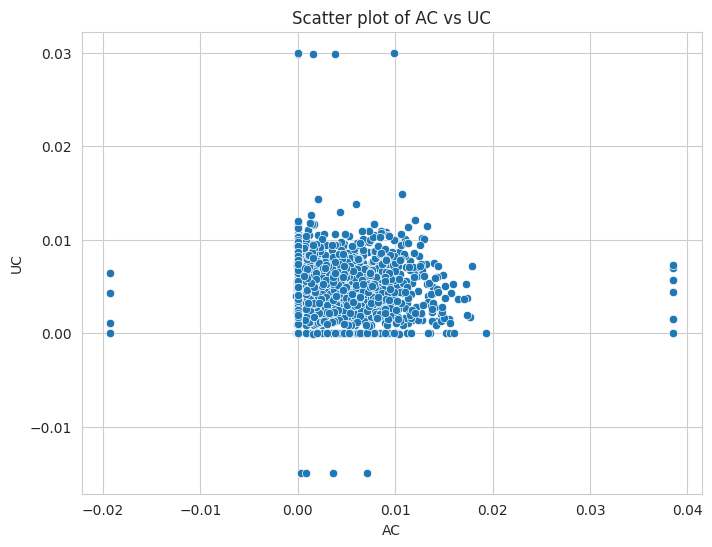

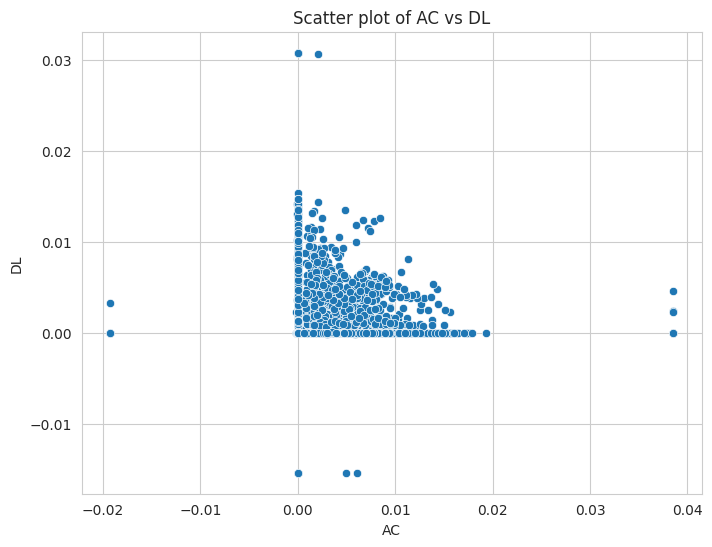

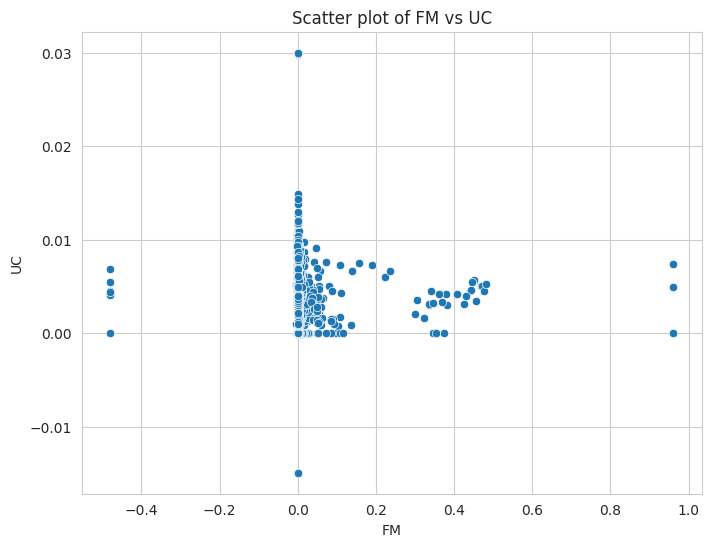

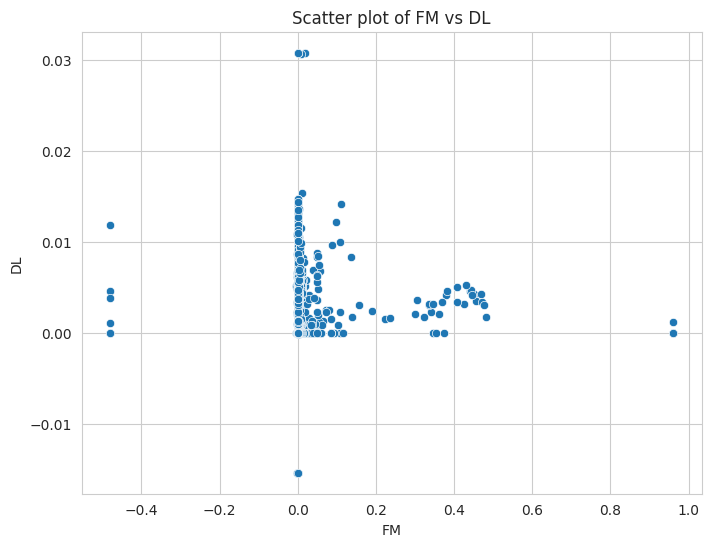

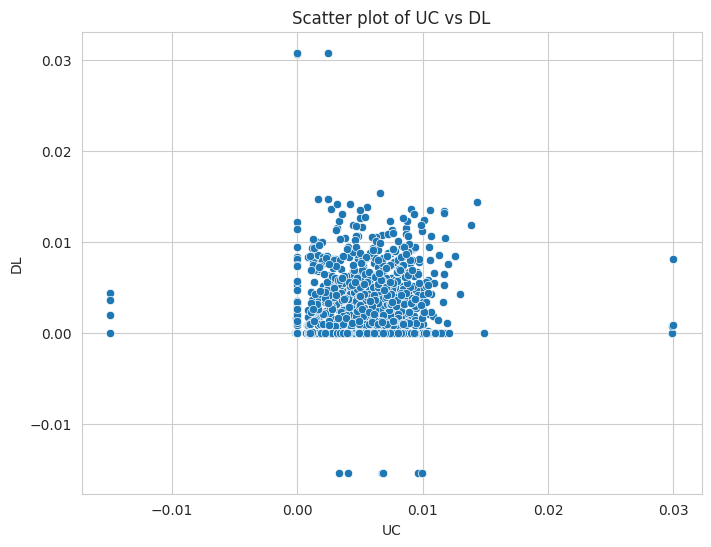

In [14]:
selected_cols = ['LB', 'AC', 'FM', 'UC', 'DL']

for i in range(len(selected_cols)):
    for j in range(i + 1, len(selected_cols)):
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=df_imputed, x=selected_cols[i], y=selected_cols[j])
        plt.title(f'Scatter plot of {selected_cols[i]} vs {selected_cols[j]}')
        plt.show()

### correlation heatmap

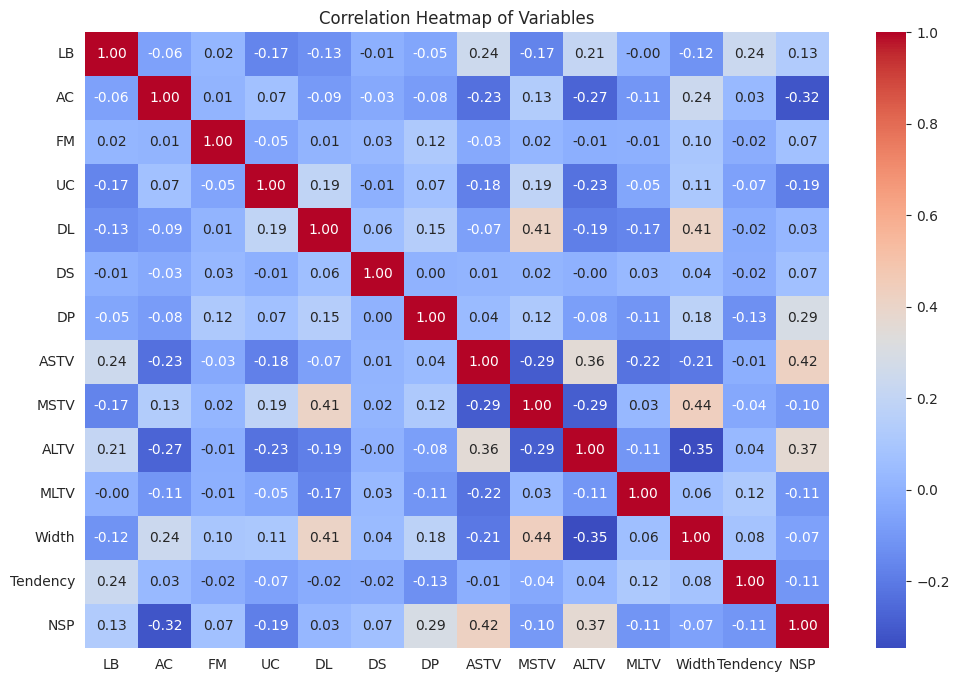

In [15]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Variables')
plt.show()

# Conclusion

### The key insights from the EDA are the handling of minimal missing values and the discovery of significant correlations. The analysis revealed that ASTV and MSTV are strongly correlated, as are ALTV and Width. There is also a moderate negative correlation between LB and ALTV. These findings can directly inform feature selection for a predictive model, and the identified relationships can guide medical professionals in clinical decision-making by highlighting key indicators of fetal health or distress.